<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** 
otherwise called a 'node,' the basic unit of neural networks; receives input and 'decides' how much of the input signal to pass on to the next layer in a model
- **Input Layer:** 
receives information from the dataset, the only such part of the model
- **Hidden Layer:** 
functions inside of the model that transform input data into output data
- **Output Layer:**
returns vector of values from input layer after transformation by the hidden layer
- **Activation:**
included in every node, decides how much received signal to pass on to the next layer
- **Backpropagation:**\
central mechanism by which neural networks learn; calculates gradient descent of a model to find the smallest errors, by using previous output errors to adjust weights within the model to eventually zone in on smallest possible final error


## 2. Perceptron on XOR Gates <a id="Q2"></a>

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal. Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
| 1 | 0 | 1 |


In [123]:
import numpy as np

inputs = np.array([
    [0,0],
    [0,1],
    [1,1],
    [1,0]
])

correct_outputs = np.array([[0], [1], [0], [1]])

In [88]:
# Didn't work

# class Perceptron(object):
    
#     def __init__(self, rate = 0.1, niter=100):
#         self.rate = rate
#         self.niter = niter
        
        
#     def fit(self, X, y):
        
#         def sigmoid(x):
#             return 1 / (1 + np.exp(-x))
    
#         def sigmoid_derivative(x):
#             sx = sigmoid(x)
#             return sx * (1 - x)
        
#         inputLayerNeurons = 2
#         hiddenLayerNeurons = 2
#         outputLayerNeurons = 1
        
#         hidden_weights = np.random.uniform(size=(inputLayerNeurons,
#                                                 hiddenLayerNeurons))
#         hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
#         output_weights = np.random.uniform(size=(hiddenLayerNeurons,
#                                                 outputLayerNeurons))
#         output_bias = np.random.uniform(size=(1, outputLayerNeurons))
        
#         hidden_layer_activation = np.dot(inputs, hidden_weights)
#         hidden_layer_activation += hidden_bias
#         hidden_layer_output = sigmoid(hidden_layer_activation)
        
#         output_layer_activation = np.dot(hidden_layer_output, output_weights)
#         output_layer_activation += output_bias
#         predicted_output = sigmoid(output_layer_activation)
        
#         error = correct_outputs - predicted_output
#         d_predicted_output = error * sigmoid_derivative(predicted_output)
        
#         error_hidden_layer = d_predicted_output.dot(output_weights.T)
#         d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
        
#         lr = 0.1
        
#         output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
#         output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
#         hidden_weights += inputs.T.dot(d_hidden_layer) * lr
#         hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr
        
#     def predict(self, X):
#         print(*output_bias)
    

In [132]:
class Perceptron(object):
    
    def __init__(self, input_size, lr=1, epochs=100):
        self.weights = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
        
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        z = self.weights.T.dot(x)
        a = self.activation_fn(z)
        return a
    
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.weights = self.weights + self.lr * e * x

In [134]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0]
    ])
    d = np.array([0, 1, 0, 1])
 
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.weights)

[0. 0. 0.]


In [151]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

def forward_propagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    return parameters

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [153]:
X = inputs
Y = correct_outputs
n_h = 2
n_x = X.shape[0]
n_y = Y.shape[0]
parameters = initialize_parameters(n_x, n_h, n_y)
num_iterations = 1000
learning_rate = 0.01
losses = np.zeros((num_iterations, 1))

for i in range(num_iterations):
    losses[i, 0], cache, A2 = forward_propagation(X, Y, parameters)
    grads = backward_propagation(X, Y, cache)
    parameters = update_parameters(parameters, grads, learning_rate)

[[0.01911258 0.03306665]
 [0.97564418 0.96178182]
 [0.02641046 0.03874352]
 [0.96466457 0.9617101 ]]
[[0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


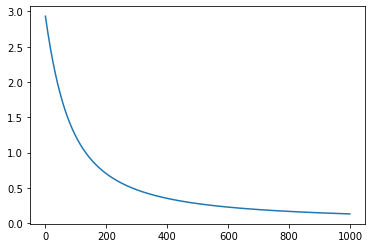

In [156]:
import matplotlib.pyplot as plt

cost, _, A2 = forward_propagation(X, Y, parameters)
pred = (A2 > 0.5) * 1.0
print(A2)
print(pred)
plt.figure()
plt.plot(losses)
plt.show();

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [9]:
import pandas as pd

df = pd.read_csv('/Users/mattmastin/Desktop/heart.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.shape

(303, 14)

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [33]:
class NeuralNetwork:
    
    def __init__(self, inputs, hiddenNodes, outputNodes):
        self.inputs = inputs
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def feed_forward(self, X):
        # calculate NN interference using feed forward process
        
        self.hidden_sum = np.dot(X, self.weights1)
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoid_derivative(o)
        
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.activated_hidden)
        
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
        self.weights1 += X.T.dot(self.z2_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)
        
    def predict(self, X):
        output = self.feed_forward(X)
        predictions = []
        for o in output:
            predictions.append([1]) if o >= 0.5 else predictions.append([0])
        return np.array(predictions)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'], axis=1).values.astype('float32')
y = df['target'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227, 1), (76, 1))

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
nn = NeuralNetwork(inputs=13, hiddenNodes=16, outputNodes=1)

epochs = 2000
for i in range(epochs):
    nn.train(X_train, y_train)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = nn.predict(X_test)

In [36]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

accuracy: 0.8157894736842105
precision: 0.8163265306122449
recall: 0.8888888888888888


## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [37]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import models
from keras import layers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(13,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                 metrics=['accuracy'])

W0816 11:42:45.041117 4752569792 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 11:42:45.050407 4752569792 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 11:42:45.156195 4752569792 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0816 11:42:45.176323 4752569792 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0816 11:42:45.182991 4752569792 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tenso

In [45]:
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
227/227 [==============================] - 0s 111us/step - loss: 0.3340 - acc: 0.8634
Epoch 2/20
227/227 [==============================] - 0s 154us/step - loss: 0.3290 - acc: 0.8678
Epoch 3/20
227/227 [==============================] - 0s 234us/step - loss: 0.3246 - acc: 0.8678
Epoch 4/20
227/227 [==============================] - 0s 102us/step - loss: 0.3195 - acc: 0.8678
Epoch 5/20
227/227 [==============================] - 0s 92us/step - loss: 0.3148 - acc: 0.8767
Epoch 6/20
227/227 [==============================] - 0s 79us/step - loss: 0.3104 - acc: 0.8767
Epoch 7/20
227/227 [==============================] - 0s 68us/step - loss: 0.3066 - acc: 0.8855
Epoch 8/20
227/227 [==============================] - 0s 113us/step - loss: 0.3022 - acc: 0.8811
Epoch 9/20
227/227 [==============================] - 0s 116us/step - loss: 0.2982 - acc: 0.8899
Epoch 10/20
227/227 [==============================] - 0s 115us/step - loss: 0.2942 - acc: 0.8987
Epoch 11/20
227/227 [===========

In [44]:
results = model.evaluate(X_test, y_test)
results

76/76 [==============================] - 0s 929us/step


[0.4050434074903789, 0.8552631610318234]

In [105]:
# Tuning batch size and epochs

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

param_grid = {'batch_size': [30, 60, 120],
              'epochs': [20, 50, 200],
             }

def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'means: {mean}, stdev:, {stdev} with: {param}')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
W0816 12:28:20.536438 4752569792 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Best: 0.6765676736831665 using {'batch_size': 30, 'epochs': 200}
means: 0.3201320081328352, stdev:, 0.27251214015063874 with: {'batch_size': 30, 'epochs': 20}
means: 0.5247524579366049, stdev:, 0.22417962892265678 with: {'batch_size': 30, 'epochs': 50}
means: 0.6765676736831665, stdev:, 0.06584138563353711 with: {'batch_size': 30, 'epochs': 200}
means: 0.5940593878428141, stdev:, 0.1131777379710837 with: {'batch_size': 60, 'epochs': 20}
means: 0.5280528167883555, stdev:, 0.19407512278735162 with: {'batch_size': 60, 'epochs': 50}
means: 0.4587458868821462, stdev:, 0.2021570138043488 with: {'batch_size': 60, 'epochs': 200}
means: 0.28052804960558814, stdev:, 0.27251214185001205 with: {'batch_size': 120, 'epochs': 20}
means: 0.43564356366793316, stdev:, 0.1670501620263581 with: {'batch_size': 120, 'epochs': 50}
means: 0.4653465251127879, stdev:, 0.16107502822985234 with: {'batch_size': 120, 'epochs': 200}


In [109]:
# Tuning optimizer options

def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(16, input_shape=(13,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=20, epochs=100, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, verbose=1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 out of  21 | elapsed:   25.0s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/100
227/227 [==============================] - 0s 2ms/sample - loss: 0.6976 - acc: 0.5110
Epoch 2/100
227/227 [==============================] - 0s 155us/sample - loss: 0.6558 - acc: 0.6035
Epoch 3/100
227/227 [==============================] - 0s 153us/sample - loss: 0.6164 - acc: 0.6696
Epoch 4/100
227/227 [==============================] - 0s 116us/sample - loss: 0.5798 - acc: 0.7401
Epoch 5/100
227/227 [==============================] - 0s 115us/sample - loss: 0.5475 - acc: 0.7621
Epoch 6/100
227/227 [==============================] - 0s 139us/sample - loss: 0.5170 - acc: 0.8018
Epoch 7/100
227/227 [==============================] - 0s 147us/sample - loss: 0.4890 - acc: 0.8150
Epoch 8/100
227/227 [==============================] - 0s 116us/sample - loss: 0.4631 - acc: 0.8150
Epoch 9/100
227/227 [==============================] - 0s 157us/sample - loss: 0.4402 - acc: 0.8326
Epoch 10/100
227/227 [==============================] - 0s 123us/sample - loss: 0.4194 - acc: 0.8370
E

In [111]:
model = grid_result.best_estimator_

y_pred = model.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

76/76 [==============================] - 0s 2ms/sample
accuracy: 0.7894736842105263
precision: 0.8372093023255814
recall: 0.8
